In [52]:
import magic
import sys, os
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
import pandas as pd

In [53]:
from scipy.spatial import ConvexHull as chull
from scipy.spatial import convex_hull_plot_2d as plot_chull

In [54]:
def compute_polygon_vertices(angles, rads):
    return np.array([np.cos(angles)*rads, np.sin(angles)*rads]).reshape(2,-1)

In [55]:
result_dir = '/home/zj/shape_optimization_resultsv6'

In [56]:
n = 8
df = pd.DataFrame([loadmat(f'{result_dir}/gd{n}/{mat_fn}') for mat_fn in sorted(os.listdir(f'{result_dir}/gd{n}'),key=lambda x: int(x.split('.')[0]))])[[
    'vertices','angles','rads','f_zero','chebabs','zk','f_plus','f_minus',
    'min_step_size_reached','max_iter_reached','iter_idx','grad','step'
]]
vertices = np.array(df.vertices.to_list())

In [57]:
df.step

0                         [[2]]
1                         [[2]]
2    [[4.4959362298109564e-05]]
3         [[0.150985733405767]]
4    [[0.00016051473715322673]]
5                         [[2]]
6                         [[2]]
Name: step, dtype: object

In [59]:
df.f_zero

0     [[-0.3158525812480044]]
1     [[-0.3218031138981773]]
2     [[-0.3333951355688648]]
3    [[-0.33425155532469514]]
4    [[-0.33482978211426995]]
5    [[-0.33545558831455385]]
6    [[-0.33634327571306727]]
Name: f_zero, dtype: object

In [60]:
def plot_polygon(i):
    plt.figure()
    v = vertices[i]
    _ = plot_chull(chull(v.T))
    plt.show()

<Figure size 640x480 with 0 Axes>

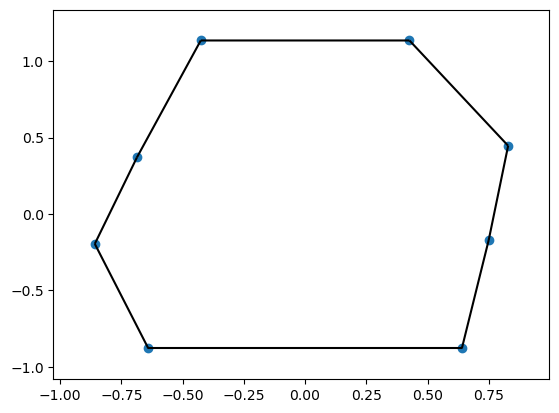

In [61]:
plot_polygon(-1)

IndexError: index 7 is out of bounds for axis 0 with size 7

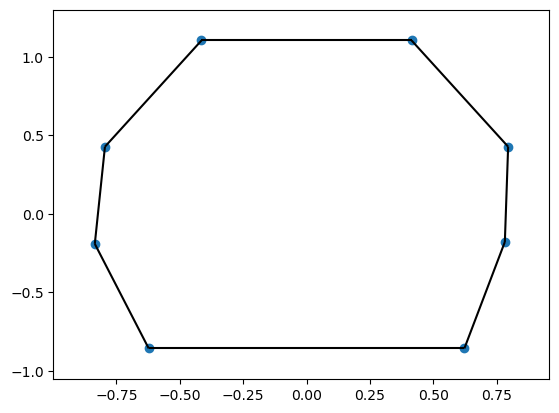

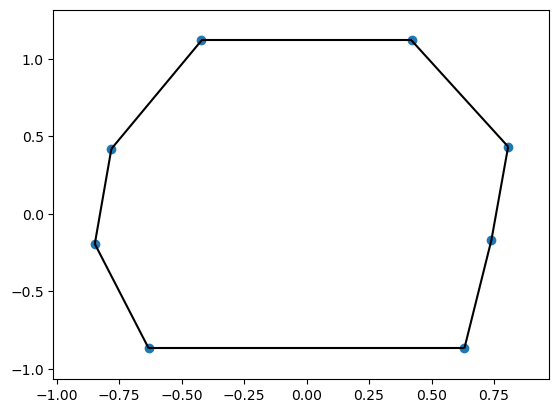

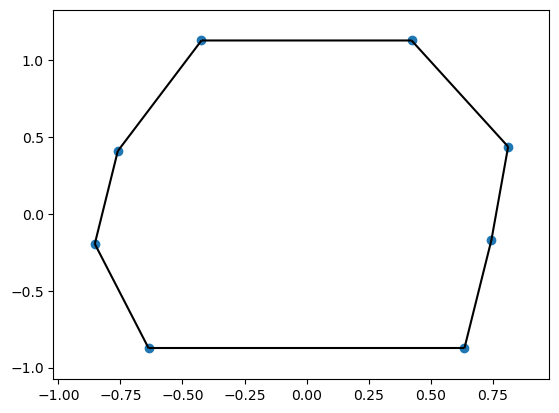

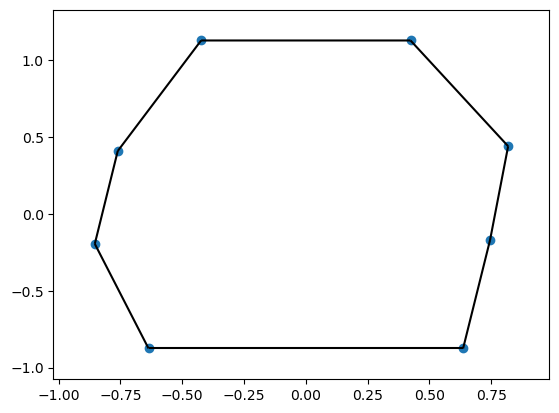

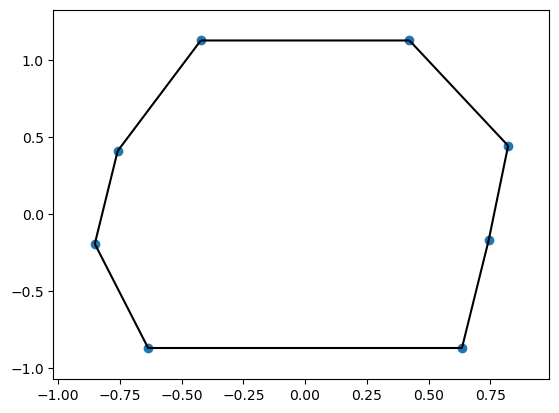

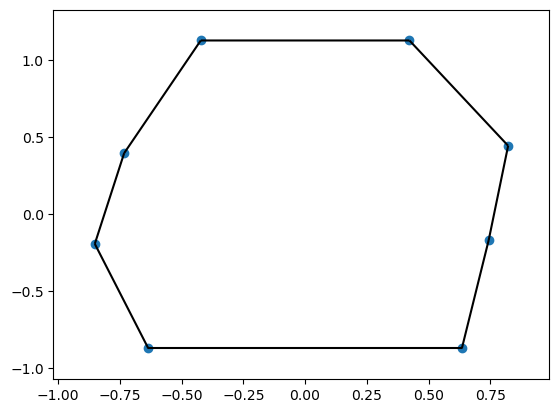

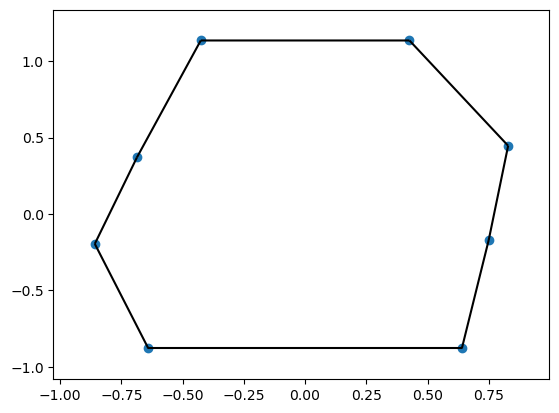

In [62]:
for i in range(10):
    v = vertices[i]
    _ = plot_chull(chull(v.T))

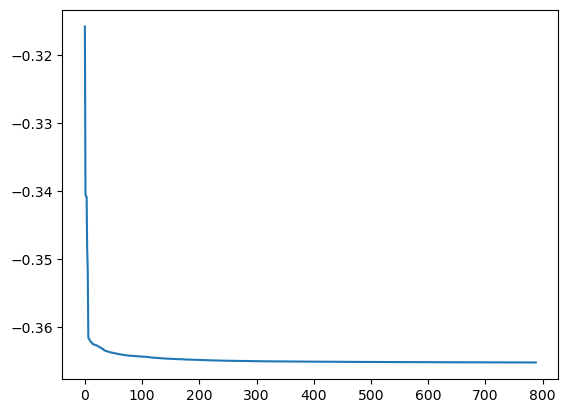

In [37]:
plt.plot(df.f_zero.apply(lambda x: x[0,0]).to_list())

In [28]:
df

,vertices,angles,rads,loss,chebabs,zk,min_step_size_reached,max_iter_reached,iter_idx,f_zero,grad,step
0,"[[0.6644012653309603, 0.736707301262446, 0.733...","[[-0.9424777960769379, -0.2243994752564138, 0....","[[1.1410837800982414, 0.7628308288061172, 0.84...",[[-0.31585258475510003]],"[[2.345479830512558, 2.86669757062646]]",[[2.606088700569509]],[[0]],[[0]],[[1]],[[-0.3158525845798615]],"[[-0.03799306874646691, 0.05438306645505486, 0...",[[1.8648496356151902]]
1,"[[0.6712380581576884, 0.7418353077891227, 0.74...","[[-0.9424777960769379, -0.2243994752564138, 0....","[[1.1421754983009733, 0.7610443180805898, 0.84...",[[-0.31585258475510003]],"[[2.427999667785686, 2.9675551495158388]]",[[2.6977774086507624]],[[0]],[[0]],[[2]],[[-0.3404105949643682]],"[[-0.0371036749425846, 0.07954167821955238, 0....",[[0.024111181442954144]]
2,"[[0.6714243973692621, 0.7417155601831703, 0.74...","[[-0.9424777960769379, -0.2243994752564138, 0....","[[1.1423207306553296, 0.7608070200384748, 0.84...",[[-0.31585258475510003]],"[[2.4064488602353413, 2.9412152736209727]]",[[2.673832066928157]],[[0]],[[0]],[[3]],[[-0.34079522934463485]],"[[-0.03917831625485646, 0.08303896336733785, -...",[[0.0030607348497226484]]
3,"[[0.6953914948000554, 0.6590482414763355, 0.74...","[[-0.9424777960769379, -0.2243994752564138, 0....","[[1.1917136101849155, 0.680935397752792, 0.850...",[[-0.31585258475510003]],"[[2.4061997766044914, 2.9409108380721563]]",[[2.6735553073383236]],[[0]],[[0]],[[4]],[[-0.340846855681948]],"[[-0.040749943690271406, 0.08481012504607532, ...",[[1]]
4,"[[0.7118645470988293, 0.6638630017006274, 0.71...","[[-0.9424777960769379, -0.2243994752564138, 0....","[[1.214038175024475, 0.6825895339391332, 0.815...",[[-0.31585258475510003]],"[[2.405791566359316, 2.9404119144391645]]",[[2.67310174039924]],[[0]],[[0]],[[5]],[[-0.34847156423208603]],"[[-0.0193826946686404, -7.799427770294187e-08,...",[[1]]
...,...,...,...,...,...,...,...,...,...,...,...,...
784,"[[1.1970756187982772, 0.7311192213096391, 0.09...","[[-0.9424777960769379, -0.2243994752564138, 0....","[[2.0365869440125755, 0.749921409521762, 0.109...",[[-0.31585258475510003]],"[[2.274517958339098, 2.7799663935255645]]",[[2.527242175932331]],[[0]],[[0]],[[785]],[[-0.365177383462293]],"[[-0.0002041780975126084, -2.947087018867478e-...",[[0.002133587097998807]]
785,"[[1.197076493405675, 0.7311193140845809, 0.096...","[[-0.9424777960769379, -0.2243994752564138, 0....","[[2.0365889032406117, 0.7499216782108623, 0.10...",[[-0.31585258475510003]],"[[2.2745182278273575, 2.7799667229001037]]",[[2.5272424753637304]],[[0]],[[0]],[[786]],[[-0.36517738415486206]],"[[-0.00020416241883203234, 1.56846757803919e-1...",[[0.006022347094634585]]
786,"[[1.1971969865092338, 0.731119573650394, 0.096...","[[-0.9424777960769379, -0.2243994752564138, 0....","[[2.0369142653608363, 0.7499662620463864, 0.10...",[[-0.31585258475510003]],"[[2.2745190567117852, 2.7799677359810713]]",[[2.527243396346428]],[[0]],[[0]],[[787]],[[-0.36517738637372765]],"[[-0.00020426542080009824, 2.449013214445017e-...",[[1]]
787,"[[1.1972683179965649, 0.7311630420702756, 0.09...","[[-0.9424777960769379, -0.2243994752564138, 0....","[[2.036914679274876, 0.7499663188419042, 0.109...",[[-0.31585258475510003]],"[[2.2747036834383043, 2.780193390869039]]",[[2.5274485371536715]],[[0]],[[0]],[[788]],[[-0.36517777526715817]],"[[-0.00020356237012686407, -5.295375249403378e...",[[0.001275654697780691]]


In [27]:
df.loss

0      [[-0.31585258475510003]]
1      [[-0.31585258475510003]]
2      [[-0.31585258475510003]]
3      [[-0.31585258475510003]]
4      [[-0.31585258475510003]]
                 ...           
784    [[-0.31585258475510003]]
785    [[-0.31585258475510003]]
786    [[-0.31585258475510003]]
787    [[-0.31585258475510003]]
788    [[-0.31585258475510003]]
Name: loss, Length: 789, dtype: object

In [18]:
df.columns

Index(['__header__', '__version__', '__globals__', 'dump_dir', 'n', 'bottom',
       'a', 'b', 'h', 'min_step_size', 'max_iter', 'result', 'vertices',
       'angles', 'rads', 'loss_params', 'loss', 'chebabs', 'zk',
       'min_step_size_reached', 'max_iter_reached', 'not_converged',
       'iter_idx', 'f_zero', 'grad', 'rad_index', 'h_vector', 'f_plus',
       'f_minus', 'step', 'nice_shape', 'is_convex', 'positive_radius',
       'not_improving', 'f_next'],
      dtype='object')

In [20]:
df.head(1).T

,0
__header__,"b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Crea..."
__version__,1.0
__globals__,[]
dump_dir,[~/shape_optimization_results/gd8]
n,[[8]]
bottom,[[0.3]]
a,[[1]]
b,[[1.5]]
h,[[0.001]]
min_step_size,[[1e-06]]


In [29]:
n = 16

fns = sorted(os.listdir(f'{result_dir}/gd{n}'), key=lambda x:int(x.split('.')[0]))
df_results = pd.DataFrame([loadmat(f'{result_dir}/gd{n}/{fn}') for fn in fns])


In [30]:
df_results.step

0    [[0.07433781948603563]]
1                [[0.03125]]
2              [[0.0078125]]
3        [[0.0001220703125]]
4      [[7.62939453125e-06]]
5    [[9.5367431640625e-07]]
Name: step, dtype: object

In [31]:
df_results.f_plus

0     [[-0.3096346516246333]]
1     [[-0.3205153712382111]]
2    [[-0.32560527712327675]]
3    [[-0.32736573716960155]]
4    [[-0.32739942162630575]]
5     [[-0.3274015394457052]]
Name: f_plus, dtype: object

In [32]:
rads = np.array(df_results.rads.apply(lambda x: x[0]).to_list())
angles = df_results.angles.iloc[0][0]

In [33]:
def get_vertices(angles, rads):
    return np.array([np.cos(angles)*rads, np.sin(angles)*rads])

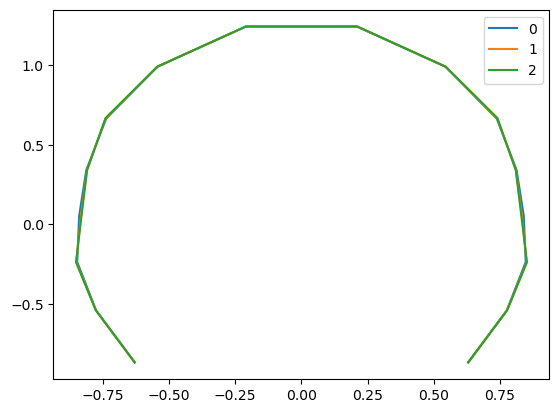

In [36]:
for i, rad in enumerate(rads): 
    if i<3:
        plt.plot(*get_vertices(angles, rad), label = i)
plt.legend()

In [13]:
angles

array([-0.9424778 , -0.22439948,  0.49367885,  1.21175717,  1.92983549,
        2.64791381,  3.36599213,  4.08407045])